# Task-1 Titanic Survival Prediction

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv("tested.csv")

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
# shape of the data
df.shape

(418, 12)

In [21]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [22]:
#basic description of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
# checking for the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
# filling null values

df["Age"]=df["Age"].fillna(df.Age.median())

In [25]:
df["Fare"]=df["Fare"].fillna(df.Fare.mean())

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Visualisation

<Axes: xlabel='Embarked', ylabel='count'>

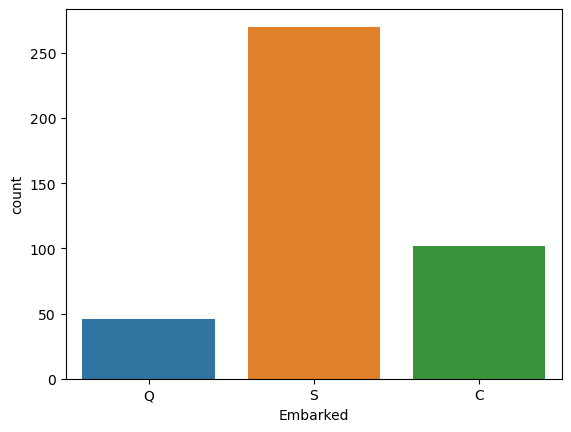

In [27]:
sns.countplot(x="Embarked",data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

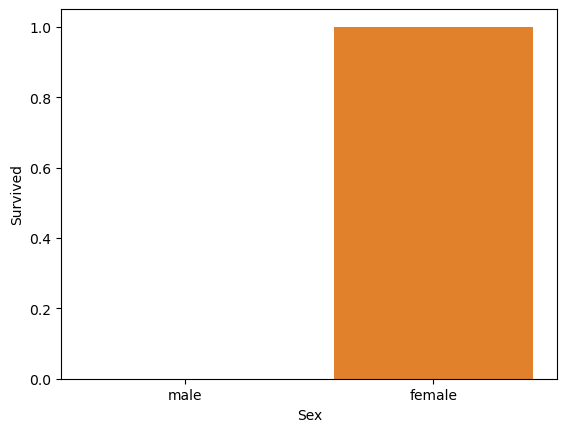

In [30]:
sns.barplot(x="Sex",y="Survived",data=df)

In [32]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.031447,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,0.008035,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,-0.467853,0.001087,0.018721,-0.576619
Age,-0.031447,0.008035,-0.467853,1.000000,-0.071197,-0.043731,0.344627
SibSp,0.003818,0.099943,0.001087,-0.071197,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,-0.043731,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.344627,0.171488,0.230001,1.000000


<Axes: >

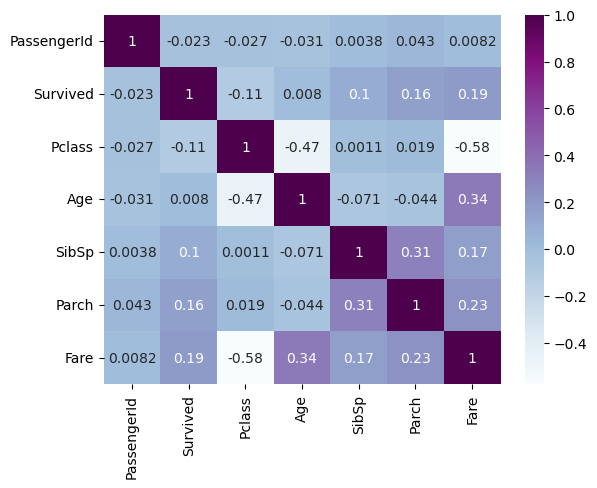

In [35]:
sns.heatmap(df.corr(),annot=True,cmap="BuPu")

<Axes: xlabel='Pclass', ylabel='count'>

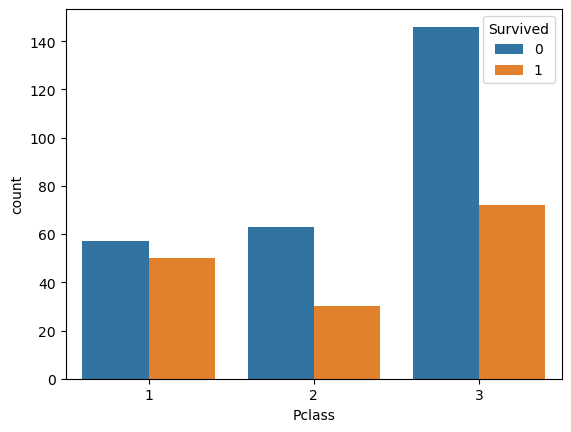

In [37]:
sns.countplot(x="Pclass",data=df,hue="Survived")

In [39]:
# in Pclass=1 , there is high cases that in which peoples survived .

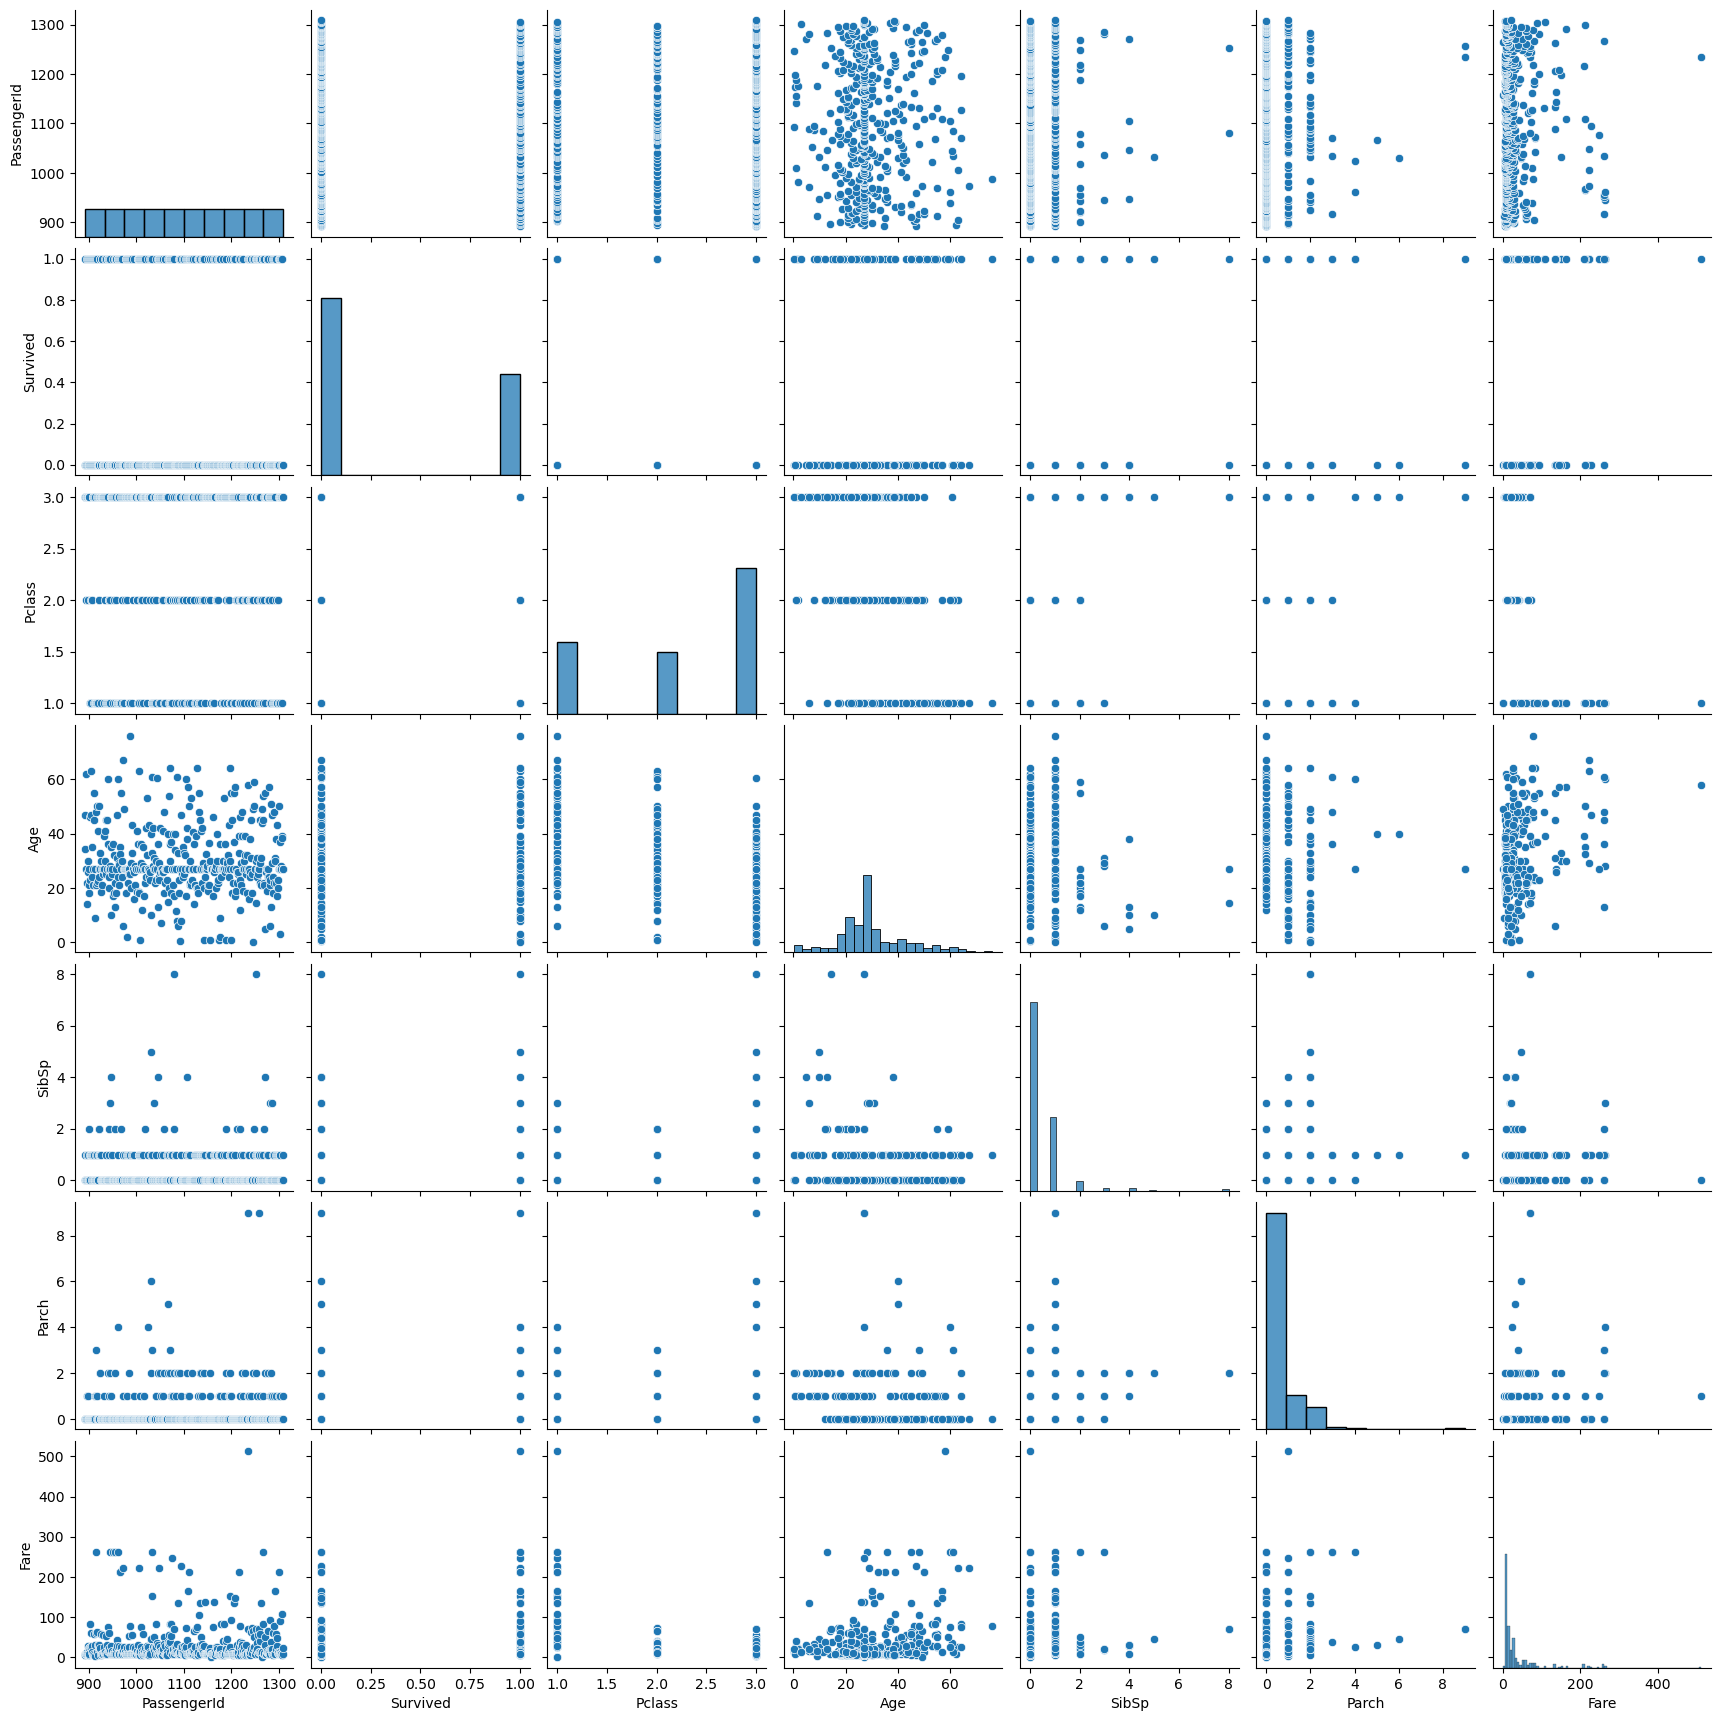

In [44]:
sns.pairplot(df)

In [54]:
old_s=df.query("Age>56")

In [56]:
old_s

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.000000,NaN,S
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.291700,D15,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.000000,C23 C25 C27,S
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.779200,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.850000,C46,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.779200,C55 C57,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375000,B57 B59 B63 B66,C
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,35.627188,NaN,S
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.158300,E45,C


<Axes: xlabel='Survived', ylabel='count'>

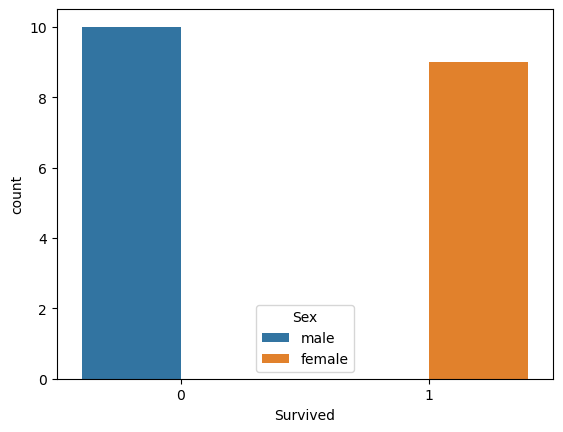

In [59]:
sns.countplot(x="Survived",data=old_s,hue="Sex")

In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [61]:
# removing extra columns which are not needed in the prediction

In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [63]:
df.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis=1,inplace=True)

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,S
414,1,1,female,39.0,0,0,C
415,0,3,male,38.5,0,0,S
416,0,3,male,27.0,0,0,S


In [65]:
# converting age values from float to int
df["Age"] = df["Age"].astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  418 non-null    int64 
 1   Pclass    418 non-null    int64 
 2   Sex       418 non-null    object
 3   Age       418 non-null    int32 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Embarked  418 non-null    object
dtypes: int32(1), int64(4), object(2)
memory usage: 21.4+ KB


In [69]:
# lets convert object into numbers values for the prediction.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
le

LabelEncoder()

In [71]:
df["Sex"] = le.fit_transform(df.Sex)
df["Embarked"] = le.fit_transform(df.Embarked)

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34,0,0,1
1,1,3,0,47,1,0,2
2,0,2,1,62,0,0,1
3,0,3,1,27,0,0,2
4,1,3,0,22,1,1,2
...,...,...,...,...,...,...,...
413,0,3,1,27,0,0,2
414,1,1,0,39,0,0,0
415,0,3,1,38,0,0,2
416,0,3,1,27,0,0,2


In [73]:
# divinding the dataset for algorithm

In [74]:
x=df.drop("Survived",axis=1)

In [75]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34,0,0,1
1,3,0,47,1,0,2
2,2,1,62,0,0,1
3,3,1,27,0,0,2
4,3,0,22,1,1,2
...,...,...,...,...,...,...
413,3,1,27,0,0,2
414,1,0,39,0,0,0
415,3,1,38,0,0,2
416,3,1,27,0,0,2


In [76]:
y=df.Survived

In [77]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [78]:
# splitting the data into train and test data

from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,test_size=0.3,
                                              random_state=42)

In [80]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
118,1,1,36,0,0,0
271,3,1,27,0,0,1
114,1,0,63,1,0,2
311,3,1,22,0,0,0
131,1,1,53,0,0,0
...,...,...,...,...,...,...
71,3,1,21,0,0,2
106,3,1,21,0,0,1
270,1,1,46,0,0,0
348,2,1,24,0,0,2


In [81]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
321,3,1,25,0,0,0
324,1,0,39,0,0,2
388,3,1,21,0,0,1
56,3,1,35,0,0,2
153,3,0,36,0,2,2
...,...,...,...,...,...,...
101,2,1,27,1,0,2
310,3,1,18,0,0,2
29,3,1,27,2,0,0
195,3,1,33,0,0,2


In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr=LogisticRegression()

In [84]:
lr

LogisticRegression()

In [85]:
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred=lr.predict(x_test)

In [87]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [89]:
# checking for the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#thus this model provides us 100% accuracy so this is the best model for this data.